In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.regression.linear_model import yule_walker
from sklearn.metrics import r2_score
from sklearn.model_selection import TimeSeriesSplit

In [24]:
df = pd.read_csv(f"../data/input_data/MAIN_DATASET.csv", index_col=[0])

selceted_df = df.iloc[41000:]
selceted_df.head()

,index,NO2_price,NO2_load_actual,NO2_load_forecasted,NO2_load_delta,NO2_generation_actual,NO2_generation_forecast,NO2_generation_delta,NO5_price,NO5_load_actual,NO5_load_forecasted,NO5_load_delta,NO5_generation_actual,NO5_generation_forecast,NO5_generation_delta,NO2_Fyllingsgrad_NVE,NO5_Fyllingsgrad_NVE,dato_id,date_time
41000,2020-09-06 21:00:00+02:00,13.49,3787,3293,-494,11422,5825,-5597,13.49,1600,1673,73,6866,3451,-3415,0.932213,0.919696,2020-09-06 21:00:00+02:00,2020-09-06-21
41001,2020-09-06 22:00:00+02:00,13.26,3512,3321,-191,11120,5650,-5470,13.26,1558,1679,121,6564,3327,-3237,0.932304,0.919822,2020-09-06 22:00:00+02:00,2020-09-06-22
41002,2020-09-06 23:00:00+02:00,13.04,3426,3056,-370,10698,5388,-5310,13.04,1489,1633,144,6478,3261,-3217,0.932395,0.919948,2020-09-06 23:00:00+02:00,2020-09-06-23
41003,2020-09-07 00:00:00+02:00,11.47,3461,2913,-548,10396,5079,-5317,11.47,1476,1586,110,6784,3356,-3428,0.932487,0.920074,2020-09-07 00:00:00+02:00,2020-09-07-00
41004,2020-09-07 01:00:00+02:00,11.37,3359,2994,-365,10198,4946,-5252,11.37,1433,1598,165,7004,3362,-3642,0.932578,0.920200,2020-09-07 01:00:00+02:00,2020-09-07-01


In [25]:
day_ahead_prices = selceted_df[["dato_id","NO2_price"]]
day_ahead_prices.head()

,dato_id,NO2_price
41000,2020-09-06 21:00:00+02:00,13.49
41001,2020-09-06 22:00:00+02:00,13.26
41002,2020-09-06 23:00:00+02:00,13.04
41003,2020-09-07 00:00:00+02:00,11.47
41004,2020-09-07 01:00:00+02:00,11.37


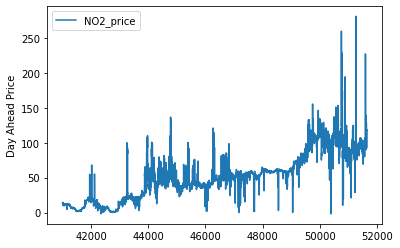

In [26]:
ax = day_ahead_prices.plot()
ax.set_ylabel("Day Ahead Price")
plt.show()

### Test if data is stationary: 

p_value=0.05321218378857337, differencing data


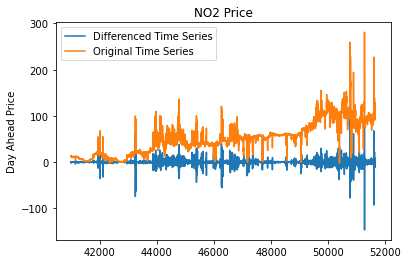

In [27]:
def hypothesis_test(df:pd.DataFrame):
    result = adfuller(df)
    #print(result)
    p_value = result[1]
    if p_value > 0.05: 
        print(f"{p_value=}, differencing data")
        df = df.diff()
        return df
    else:
        print(f"{p_value=}>0.05, no need to difference data")
        return df

differenced_NO2 = hypothesis_test(day_ahead_prices["NO2_price"])

ax1 = differenced_NO2.plot(label = "Differenced Time Series")
day_ahead_prices["NO2_price"].plot(ax=ax1, label = "Original Time Series")
ax1.set_ylabel("Day Ahead Price")
plt.title("NO2 Price")
plt.legend()
plt.show()

